<a href="https://colab.research.google.com/github/vieweghn/EENG-310-Signals-and-Systems/blob/main/EENG_310_HW12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import some helpful libraries

import scipy.io as sio
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
import os
import sympy as sp


A. (35) Design a notch filter that meets the following specifications:
* It eliminates 100 Hz.
* $\left| h(t) \right| \le 0.001$ for $t > 0.5\mathrm{~s}$.

Plot the resulting impulse and frequency responses

See the [example](https://colab.research.google.com/drive/1cPge0og8ARmpASiiOlFyTuKPwW7CwdHH?usp=sharing) we worked out in class

B (44) Design a Butterworth highpass filter that meets the following specifications:

* $\left | H(\omega)\right |= 0.10$ at $6\mathrm{~Hz}$ and
* $\left| H(\omega)\right |= 0.91$ at $17\mathrm{~Hz}$.

Compute the following:
1. The order $N$ and cutoff frequency $\omega_c$
2. The locations of the poles
3. The transfer function $H(s)$
4. The LCCDE description of the filter

You need a 3rd order filter should work with $f_c=13\mathrm{~Hz}$.

$$ H(s) = \frac{s^3}{s^3 + 163.4 s^2 + 13344 s + 544970} $$

$$ y''' + 163.4 y'' + 13344 y' + 544970 = x''' $$

C (48) Design a fourth-order Butterworth lowpass filter using two stages of the Sallen-Key circuit shown in the figure below. In each stage use $R_1 = R_2 = 10\mathrm{~k\Omega}$ and select $C_1$ and $C_2$ so that the cutoff frequency is $100\mathrm{~Hz}$. Test your final design in a simulator.

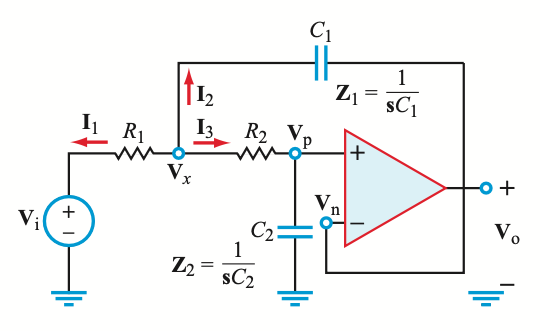

Stage 1: $C_1=0.416 \mathrm{~\mu F}$, $C_2= 60.9\mathrm{~nF}$

Stage 2: $C_1=0.172 \mathrm{~\mu F}$, $C_2=.147\mathrm{~\mu F}$

D (57) In World War II, voice radio scramblers used modulation schemes to distort a signal so that enemy forces could not understand it unless it was demodulated properly. In one scheme, a signal $x(t)$, bandlimited to $4\mathrm{~kHz}$, is modulated to generate an output signal

$$ y(t)=\left [ 2 x(t) \cos(8000\pi t)\right ]\times \left[ \frac{\sin(8000\pi t)}{\pi t}\right ]$$

(a) Describe why the scrambled signal’s spectrum is
“distorted.”
(b) Show that $x(t)$ can be recovered from $y(t)$ using

$$ x(t)=\left [ 2 y(t) \cos(8000\pi t)\right ]\times \left[ \frac{\sin(8000\pi t)}{\pi t}\right ]$$


Just describe what happens in words.

E. What does aliasing sound like? (No work for you here. Just go through the steps and tell me what you hear!)

Let's grab some captured audio from the Author website. This is a speech signal (a single sentence) sampled at 24000 samples/s.

In [4]:
# load some audio data from the Author website
if not os.path.exists("P673.mat"):
  !wget --no-check-certificate https://ss2-2e.eecs.umich.edu/123hide456/problems/matfiles/chap6/P673.mat

--2025-12-08 21:25:41--  https://ss2-2e.eecs.umich.edu/123hide456/problems/matfiles/chap6/P673.mat
Resolving ss2-2e.eecs.umich.edu (ss2-2e.eecs.umich.edu)... 141.213.3.8
Connecting to ss2-2e.eecs.umich.edu (ss2-2e.eecs.umich.edu)|141.213.3.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 576184 (563K)
Saving to: ‘P673.mat’

P673.mat            100%[===================>] 562.68K  3.46MB/s    in 0.2s    

2025-12-08 21:25:42 (3.46 MB/s) - ‘P673.mat’ saved [576184/576184]



In [5]:
# using python's scipy library to load the file
data = sio.loadmat('P673.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat Oct 25 20:16:59 2014',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-2.36951356e-04, -5.89562016e-05, -1.14907611e-04, ...,
         -7.55270745e-05, -2.68297001e-04, -4.22929977e-04]])}

(a) Listen to the signal using the Colab widget below.

In [6]:
# pull out the audio data and load it in a widget in the notebook. Listen to it! It's 3 sec at 24000 sps
x = data['X'][0]
Audio(x, rate=24e3)

(b) Let's plot the one-sided magnitude spectrum from 0 to 8 kHz using the numpy "Fast Fourier Transform" function. Use:

    N=len(x)//2
    F=np.linspace(0,8000,N)
    FX=np.abs(np.fft.fft(x))
    plt.title("Spectrum of x(t)")
    plt.plot(F,FX[:N])
    plt.grid()
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude of FFT")
    plt.plot()

N= 36000


[]

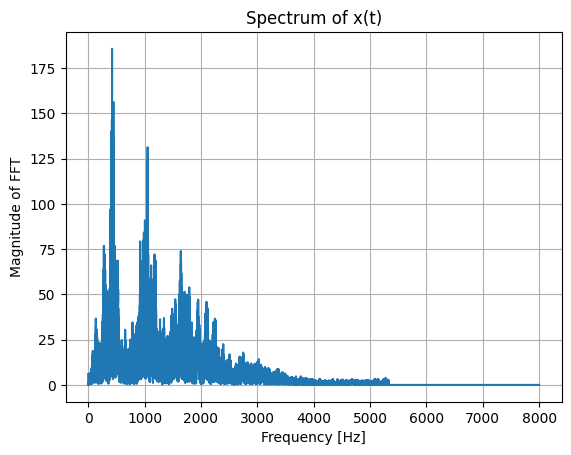

In [7]:
N=len(x)//2
print("N=",N)
F=np.linspace(0,8000,N)
FX=np.abs(np.fft.fft(x))
plt.title("Spectrum of x(t)")
plt.plot(F,FX[:N])
plt.grid()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude of FFT")
plt.plot()

In [8]:
y=x[:-1:4]
Audio(y, rate=6e3)

N= 9000


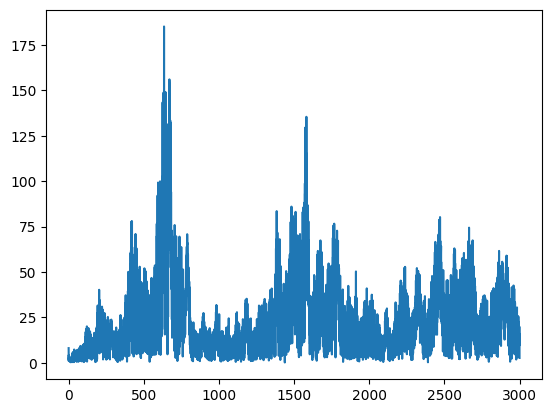

In [9]:
N=len(y)//2
print("N=",N)
F=np.linspace(0,3000,N)
FY=4*np.abs(np.fft.fft(y))
plt.plot(F,FY[:N])

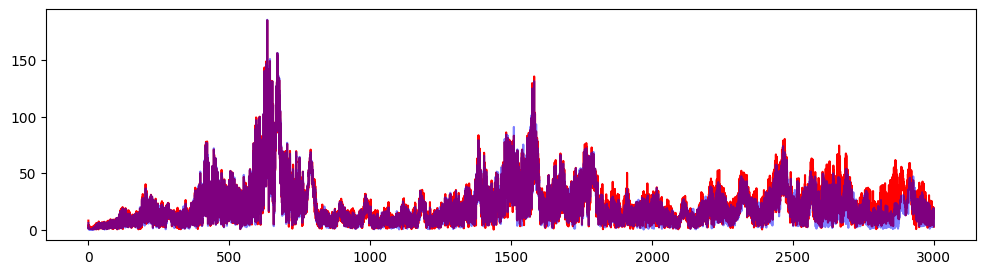

In [10]:
plt.figure(figsize=(12,3))
plt.plot(F,FY[:N],'r')
plt.plot(F,FX[:N],'b',alpha=0.5)


What do you notice about the spectrum? Explain.

F. A signal $x(t)$ has the bandlimited spectrum shown in the figure below. If $x(t)$ is sampled at $10\mathrm{samples/s}$ and then passed through an ideal brick-wall lowpass filter with a cutoff frequency of $5\mathrm{~Hz}$, sketch the spectrum of the output signal. What would be the minium sample rate you could use to sample this signal without aliasing? Explain.

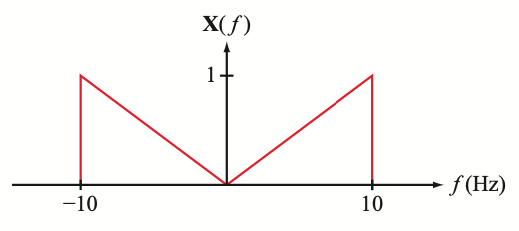

The output spectrum looks like this:

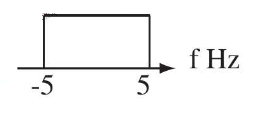